## Marketing Analytics Project : Customer Return Prediction & Product Analysis for Disney 
#### Author: Mirabelle Ding
***
**Objective**: Developed predictive models to analyze factors influencing customer's return purchase for Disney Cruise Line and conducted A/B testing to assess the popularity of different Popcorn bucket product offerings.

**Methodology**:

* Applied Logistic Regression and Random Forest classifiers to predict the likelihood of a household purchasing a return cruise ticket within three years, based on top influencing factors identified in the feature importance analysis.
* Addressed multicollinearity, performed feature engineering, and optimized models using GridSearchCV for hyperparameter tuning.
* Conducted A/B testing with pairwise t-tests to analyze sales data and determine significant differences in the popularity of various Disney-themed products across different global locations.

**Skills Utilized**:Python (Pandas, NumPy, Scikit-Learn, Statsmodels, Matplotlib, SciPy), Machine Learning (Classification, Feature Engineering, Model Optimization), Statistical Analysis, A/B Testing, Data Visualization

***


# Classification

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

In [60]:
df = pd.read_csv('/Users/mirabelleding/Downloads/cruise_returners.csv')
df.head()

,hhold_ID,discount_original,coupon_received,cabin_type,est_inc,season_of_year,ticket_spend,cruise_theme,incidental_spending,park_package,embark_port,res_to_port,number_children,oldest_child_age,dis_plus_sub,return_1065
0,3598,1,1,Verandah,19280.985,Winter,2649,prin_fro,2898.754343,1,Vancouver,558,3,6.0,1,0
1,155,1,0,Concierge,825719.960,Spring,2941,Star Wars,2898.754343,1,Port Canaveral,280,3,8.0,1,0
2,353,1,0,Oceanview,3755246.459,Fall,2609,Marvel,11750.829364,1,Port Canaveral,351,3,3.0,1,0
3,1474,1,1,Oceanview,96831.550,Winter,2367,Marvel,13945.343512,1,Copenhagen,314,3,7.0,0,0
4,3272,1,0,Verandah,11027.249,Spring,3021,Marvel,2898.754343,1,Copenhagen,342,4,10.0,1,0


In [61]:
df.isnull().sum()

hhold_ID                  0
discount_original         0
coupon_received           0
cabin_type                0
est_inc                   0
season_of_year            0
ticket_spend              0
cruise_theme           1250
incidental_spending       0
park_package              0
embark_port               0
res_to_port               0
number_children           0
oldest_child_age        370
dis_plus_sub              0
return_1065               0
dtype: int64

In [62]:
df.dropna(inplace=True)
df.isnull().sum()
# cleaning all null values

hhold_ID               0
discount_original      0
coupon_received        0
cabin_type             0
est_inc                0
season_of_year         0
ticket_spend           0
cruise_theme           0
incidental_spending    0
park_package           0
embark_port            0
res_to_port            0
number_children        0
oldest_child_age       0
dis_plus_sub           0
return_1065            0
dtype: int64

In [63]:
numerical = ['est_inc','ticket_spend','incidental_spending','res_to_port','number_children','oldest_child_age']
cor_matrix = df[numerical].corr()
cor_matrix #check for multicollinearity that have a correlation > 0.8

,est_inc,ticket_spend,incidental_spending,res_to_port,number_children,oldest_child_age
est_inc,1.000000,-0.009847,0.635081,-0.003779,-0.014312,-0.001508
ticket_spend,-0.009847,1.000000,-0.001415,0.014506,-0.026013,-0.015859
incidental_spending,0.635081,-0.001415,1.000000,0.006716,0.013953,-0.019933
res_to_port,-0.003779,0.014506,0.006716,1.000000,0.023213,0.019659
number_children,-0.014312,-0.026013,0.013953,0.023213,1.000000,-0.010318
oldest_child_age,-0.001508,-0.015859,-0.019933,0.019659,-0.010318,1.000000


In [65]:
df = df.drop(columns = 'hhold_ID')

In [66]:
dummies = ['cabin_type','season_of_year','cruise_theme','embark_port']
df1 = pd.get_dummies(df,columns = dummies, drop_first = True)
df1.head()

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub,...,season_of_year_Winter,cruise_theme_Princess/Frozen,cruise_theme_Star Wars,cruise_theme_prin_fro,cruise_theme_starwars,embark_port_Copenhagen,embark_port_New York,embark_port_Port Canaveral,embark_port_San Diego,embark_port_Vancouver
0,1,1,19280.985,2649,2898.754343,1,558,3,6.0,1,...,1,0,0,1,0,0,0,0,0,1
1,1,0,825719.960,2941,2898.754343,1,280,3,8.0,1,...,0,0,1,0,0,0,0,1,0,0
2,1,0,3755246.459,2609,11750.829364,1,351,3,3.0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,96831.550,2367,13945.343512,1,314,3,7.0,0,...,1,0,0,0,0,1,0,0,0,0
4,1,0,11027.249,3021,2898.754343,1,342,4,10.0,1,...,0,0,0,0,0,1,0,0,0,0


## Iteration 1

In [67]:
X = df1.drop(columns = 'return_1065')
y = df1['return_1065']

seed = 70
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = .4, random_state = seed)

print(X_train.shape, X_test.shape)

(3564, 25) (2377, 25)


In [68]:
logmodel = sm.Logit(y_train, X_train).fit()
logmodel.summary()

Optimization terminated successfully.
         Current function value: 0.646336
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            return_1065   No. Observations:                 3564
Model:                          Logit   Df Residuals:                     3539
Method:                           MLE   Df Model:                           24
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                 0.06607
Time:                        17:29:11   Log-Likelihood:                -2303.5
converged:                       True   LL-Null:                       -2466.5
Covariance Type:            nonrobust   LLR p-value:                 9.695e-55
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
discount_original               -0.6233      0.073     -8.537      0.000      -0.766      -0.480
coupon_received                 -0.1037      0.080     -1.300      0.194      -0.260       0.053
est_inc                       4.151e-08   3.19e-08      1.302      0.193    -2.1e-08    1.04e-07
ticket_spend                  5.379e-05    5.2e-05      1.034      0.301   -4.82e-05       0.000
incidental_spending            1.58e-06   4.68e-06      0.337      0.736    -7.6e-06    1.08e-05
park_package                    -0.7076      0.073     -9.650      0.000      -0.851      -0.564
res_to_port                     -0.0021      0.001     -3.509      0.000      -0.003      -0.001
number_children                  0.2018      0.031      6.553      0.000       0.141       0.262
oldest_child_age                -0.0513      0.007     -6.865      0.000      -0.066      -0.037
dis_plus_sub                     0.0015      0.074      0.021      0.983      -0.143       0.146
cabin_type_Inside                0.0349      0.100      0.349      0.727      -0.161       0.231
cabin_type_Oceanview            -0.0416      0.098     -0.425      0.671      -0.233       0.150
cabin_type_Verandah             -0.0239      0.097     -0.246      0.806      -0.214       0.166
season_of_year_Spring            0.2143      0.098      2.185      0.029       0.022       0.407
season_of_year_Summer            0.1773      0.100      1.774      0.076      -0.019       0.373
season_of_year_Winter            0.1948      0.099      1.968      0.049       0.001       0.389
cruise_theme_Princess/Frozen     0.0926      0.110      0.839      0.401      -0.124       0.309
cruise_theme_Star Wars           0.0707      0.111      0.639      0.523      -0.146       0.287
cruise_theme_prin_fro            0.0836      0.110      0.762      0.446      -0.131       0.299
cruise_theme_starwars            0.1815      0.110      1.648      0.099      -0.034       0.397
embark_port_Copenhagen          -0.0581      0.118     -0.494      0.621      -0.289       0.173
embark_port_New York            -0.0376      0.118     -0.318      0.750      -0.269       0.194
embark_port_Port Canaveral       0.0580      0.116      0.500      0.617      -0.169       0.285
embark_port_San Diego            0.4107      0.120      3.409      0.001       0.175       0.647
embark_port_Vancouver            0.6458      0.119      5.424      0.000       0.412       0.879
================================================================================================
"""

#### Numerical variables that have a p-value > 0.05 are: est_inc, ticket_spend, incidental_spending
#### Categorical vairables that a p-value > 0.05 in all their levels of variations are: coupon_received, dis_plus_sub, cabin_type, cruise_theme

## Iteration 2

In [74]:
drop_col = ['coupon_received','est_inc','ticket_spend','incidental_spending','dis_plus_sub','cabin_type_Inside', 
            'cabin_type_Oceanview','cabin_type_Verandah','cruise_theme_Princess/Frozen', 'cruise_theme_Star Wars',
            'cruise_theme_prin_fro', 'cruise_theme_starwars'] #removing insignificant variables

X_train2 = X_train.drop(columns = drop_col)
logmodel2 = sm.Logit(y_train, X_train2).fit()
logmodel2.summary()

Optimization terminated successfully.
         Current function value: 0.647935
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:            return_1065   No. Observations:                 3564
Model:                          Logit   Df Residuals:                     3551
Method:                           MLE   Df Model:                           12
Date:                Thu, 08 Aug 2024   Pseudo R-squ.:                 0.06376
Time:                        17:52:45   Log-Likelihood:                -2309.2
converged:                       True   LL-Null:                       -2466.5
Covariance Type:            nonrobust   LLR p-value:                 4.138e-60
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
discount_original             -0.5964      0.072     -8.315      0.000      -0.737      -0.456
park_package                  -0.6944      0.073     -9.565      0.000      -0.837      -0.552
res_to_port                   -0.0020      0.001     -3.327      0.001      -0.003      -0.001
number_children                0.2220      0.028      8.004      0.000       0.168       0.276
oldest_child_age              -0.0461      0.007     -6.705      0.000      -0.060      -0.033
season_of_year_Spring          0.2434      0.095      2.575      0.010       0.058       0.429
season_of_year_Summer          0.2186      0.096      2.277      0.023       0.030       0.407
season_of_year_Winter          0.2295      0.095      2.423      0.015       0.044       0.415
embark_port_Copenhagen        -0.0143      0.112     -0.128      0.898      -0.234       0.205
embark_port_New York           0.0264      0.112      0.235      0.814      -0.194       0.247
embark_port_Port Canaveral     0.1180      0.110      1.072      0.284      -0.098       0.334
embark_port_San Diego          0.4648      0.115      4.036      0.000       0.239       0.690
embark_port_Vancouver          0.6980      0.113      6.155      0.000       0.476       0.920
==============================================================================================
"""

In [78]:
X_test2 = X_test.drop(columns = drop_col)

sklog = LogisticRegression(max_iter = 2000)
sklog.fit(X_train2, y_train)

LogisticRegression(max_iter=2000)

In [86]:
predictions = sklog.predict(X_test2)
acc_score_test = accuracy_score(y_test,predictions)

mat = confusion_matrix(y_test, predictions)
sensitivity = mat[0][0]/(mat[0][0] + mat[1][0]) 
specificity = mat[1][1]/(mat[0][1] + mat[1][1])
precision = mat[0][0]/sum(mat[0])
balanced_accuracy = (sensitivity + specificity)/2

print(f'The scikit-learn regression model has: \n accuracy score of {acc_score_test:.4f} \n',
      f'sensitivity of {sensitivity:.4} \n specificity of {specificity:.4f} \n precision of {precision:.4f}\n',
      f'balanced accuracy of {balanced_accuracy:.4f}'
     )

The scikit-learn regression model has: 
 accuracy score of 0.6142 
 sensitivity of 0.6218 
 specificity of 0.6049 
 precision of 0.6586
 balanced accuracy of 0.6134


In [102]:
train_predictions = sklog.predict(X_train2)
acc_score_train = accuracy_score(y_train, train_predictions)
print(f'The training accuracy is {acc_score_train:.4f}; the test accuracy is {acc_score_test:.4f}.')

The training accuracy is 0.6120; the test accuracy is 0.6142.


#### The close proximity of the training accuracy and test accuracy denotes that the model is not overfitting, and generalizes well to unseen data.  However, the performance metrics show moderate capability in predicting a household's probability of returning to the Disney Cruise voyage.

## Random Forest

In [91]:
df2 = pd.get_dummies(df,columns = dummies, drop_first = False)
df2.head()

,discount_original,coupon_received,est_inc,ticket_spend,incidental_spending,park_package,res_to_port,number_children,oldest_child_age,dis_plus_sub,...,cruise_theme_Princess/Frozen,cruise_theme_Star Wars,cruise_theme_prin_fro,cruise_theme_starwars,embark_port_Barcelona,embark_port_Copenhagen,embark_port_New York,embark_port_Port Canaveral,embark_port_San Diego,embark_port_Vancouver
0,1,1,19280.985,2649,2898.754343,1,558,3,6.0,1,...,0,0,1,0,0,0,0,0,0,1
1,1,0,825719.960,2941,2898.754343,1,280,3,8.0,1,...,0,1,0,0,0,0,0,1,0,0
2,1,0,3755246.459,2609,11750.829364,1,351,3,3.0,1,...,0,0,0,0,0,0,0,1,0,0
3,1,1,96831.550,2367,13945.343512,1,314,3,7.0,0,...,0,0,0,0,0,1,0,0,0,0
4,1,0,11027.249,3021,2898.754343,1,342,4,10.0,1,...,0,0,0,0,0,1,0,0,0,0


In [94]:
X2 = df2.drop(columns = 'return_1065')
y2 = df2['return_1065']

seed = 70
X2_train, X2_test,y2_train, y2_test = train_test_split(X2, y2, test_size = .4, random_state = seed)
print(X2_train.shape, X2_test.shape)

(3564, 29) (2377, 29)


In [99]:
clf = RandomForestClassifier()
param_grid = {
    'n_estimators':[50,100,150],
    'max_depth':[2,4,6,8],
    'max_features':[4,8,12,16,20],
    'min_samples_leaf':[2,4,6,10]
}
CV_rfc = GridSearchCV(estimator = clf, param_grid=param_grid, cv = 5)
CV_rfc.fit(X2_train, y2_train)
print(CV_rfc.best_params_)

{'max_depth': 4, 'max_features': 20, 'min_samples_leaf': 6, 'n_estimators': 100}


In [100]:
clf = RandomForestClassifier(n_estimators = 100, max_depth = 8, max_features = 16, min_samples_leaf = 2, random_state = seed)
clf.fit(X2_train, y2_train)

feature_imp = pd.DataFrame(list(zip(clf.feature_importances_,X2_train)))
feature_imp.columns = ['feature importance','feature']
feature_imp = feature_imp.sort_values(by = 'feature importance', ascending = False)
feature_imp

,feature importance,feature
0,0.126436,discount_original
6,0.124815,res_to_port
2,0.104109,est_inc
5,0.103408,park_package
3,0.098673,ticket_spend
8,0.095529,oldest_child_age
4,0.081053,incidental_spending
7,0.064402,number_children
28,0.040154,embark_port_Vancouver
27,0.013974,embark_port_San Diego


In [101]:
predictions2 = clf.predict(X2_test)
clf_acc_score = accuracy_score(y2_test,predictions2)

mat2 = confusion_matrix(y2_test, predictions2)
sensitivity2 = mat2[0][0]/(mat2[0][0] + mat2[1][0])  
specificity2 = mat2[1][1]/(mat2[0][1] + mat2[1][1])
precision2 = mat2[0][0]/sum(mat2[0])
balanced_accuracy2 = (sensitivity2 + specificity2)/2

print(f'The random forest model has: \n accuracy score of {clf_acc_score:.4f} \n',
      f'sensitivity of {sensitivity2:.4} \n specificity of {specificity2:.4f} \n precision of {precision2:.4f}\n',
      f'balanced accuracy of {balanced_accuracy2:.4f}'
     )

The random forest model has: 
 accuracy score of 0.6630 
 sensitivity of 0.6764 
 specificity of 0.6486 
 precision of 0.6748
 balanced accuracy of 0.6625


In [104]:
train_predictions2 = clf.predict(X2_train)
clf_acc_score_train = accuracy_score(y2_train, train_predictions2)
print(f'The training accuracy is {clf_acc_score_train:.4f}; the test accuracy is {clf_acc_score:.4f}.')

The training accuracy is 0.8092; the test accuracy is 0.6630.


#### The overall performance metrics of the random forest model are slightly higher than that of the scikit-learn regression model, indicating improved predicive capability.  The significantly wider gap between the training accuracy and test accuracy in random forest model suggests that the model may be overfitting.  Nevertheless, the random forest model still holds a higher test accuracy score than the scikit-learn regression model, and therefore should be the preferred choice in predicting the possibility of a return voyage for a particular household.

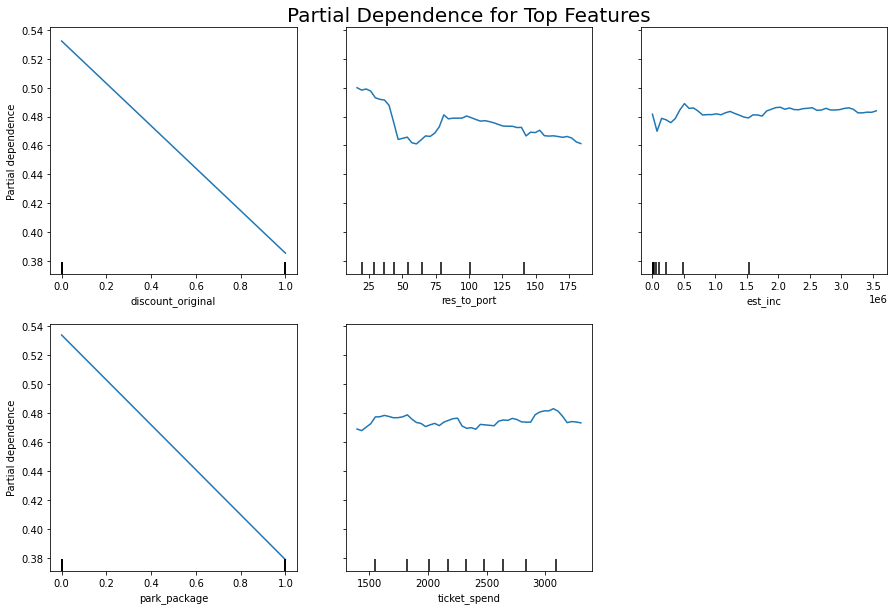

In [120]:
top_features = ['discount_original', 'res_to_port', 'est_inc', 'park_package', 'ticket_spend']
feature_index = feature_indices = [X2_train.columns.get_loc(feature) for feature in top_features]

fig, ax = plt.subplots(figsize=(15, 10))  
display = PartialDependenceDisplay.from_estimator(
    clf, 
    X2_train, 
    features=feature_indices, 
    ax=ax,
    grid_resolution=50  
)

ax.set_title('Partial Dependence for Top Features', fontsize = 20)
plt.show()

#### According to the Random Forest model, top features that have the most influence on wether an existing household customer will purchase a return ticket to the Disney Cruise voyage within 3 years are: discount_original, res_to_port, est_inc, park_package, and ticket_spend.  The partial dependence plot of these top influential variables is drawn to examine how they affect the outcome variable.

## Conclusion

The model indicates that discount_original and park_package has a negative coefficient in their partial dependence plots, i.e. as these cost-saving-related feature increases, the likelihood of the customer purchasing another Disney Cruise voyage decreases.  The phenomenon that discount on the first voyage decreases the likelihood of a return purchase may seem counterintuitive.  However, this could imply that a large number of customers are price-sensitive and less loyal, as they embarked on the Disney Cruise trip only because a discount is offered.

The res_to_port shows a diminishing negative effect on the probability of a return purchase.  This could be interpreted as distance to a port decreases the customer’s willingness to go on a cruise trip due to travel inconvenience, and yet beyond a certain point, this effect has minimal influence.  According to the dataset Disney could launch marketing campaigns targeting at customers living in a specific range to enhance their return purchase probability.

The est_inc and ticket_spend features show relatively flat partial dependence plots, indicating that although financial factors are important, they are not the primary drivers of a customer’s return purchase probability in this model.  Customers may be more motivated to embark on a return voyage for enhanced customer experience, discounts, additional packages, etc.

In conclusion, Disney should focus more on creating values that are beyond solely price incentives in their customer retention strategies, such as building customer loyalty and providing exceptional experience, which could ultimately lead to improved return purchase rate and sustainable business model.

# 

# A/B Testing

In [16]:
import pandas as pd
import scipy.stats as stats

#### Null hypothesis: There is no difference between the popularity of different popcorn buckets
#### Alternative hypothesis: There is difference between the popularity of different popcorn buckets

In [3]:
df = pd.read_csv('/Users/mirabelleding/Downloads/popcorn_buckets.csv')
df.head()

,location,bucket,Q1_sales_USD
0,Disneyland Paris,Cinderella,139413.1
1,Disneyland Paris,Star_Wars,138890.4
2,Disneyland Paris,Mermaid,117696.4
3,Disneyland Paris,MickeySuit,176821.9
4,Disneyland Paris,MickeyEars,168442.1


In [28]:
df.groupby(['bucket']).describe()

Q1_sales_USD                                                     \
                  count           mean           std       min         25%   
bucket                                                                       
Cinderella          6.0  136139.850000   8362.372118  128031.7  128860.350   
Mermaid             6.0  123628.983333   6882.250179  116015.3  118180.575   
MickeyEars          6.0  154566.350000  11395.606430  141166.3  146513.325   
MickeySuit          6.0  167465.233333   9942.367653  153955.9  160831.200   
RedWhite            6.0   96923.400000  10895.539817   81159.8   93744.325   
Star_Wars           6.0  139564.566667  11778.816778  122046.4  133260.525   

                                             
                  50%         75%       max  
bucket                                       
Cinderella  135215.75  141216.100  148417.8  
Mermaid     122721.40  128754.350  132883.5  
MickeyEars  152454.00  164374.950  168442.1  
MickeySuit  168215.60  176274.700  177073.5  
RedWhite     95140.45  100796.275  114139.2  
Star_Wars   141632.35  144616.625  155995.0

In [43]:
sales = df.pivot(index = 'location',columns = 'bucket',values = 'Q1_sales_USD')
sales #pivot the table for easier comparison across different column

bucket,Cinderella,Mermaid,MickeyEars,MickeySuit,RedWhite,Star_Wars
location,,,,,,
Disneyland Paris,139413.1,117696.4,168442.1,176821.9,93623.9,138890.4
Disneyland Resort,128031.7,116015.3,157672.2,174633.1,81159.8,144374.3
Hong Kong Disneyland Resort,141817.1,125809.7,146272.5,177073.5,102336.6,144697.4
Shanghai Disney Resort,131018.4,132883.5,141166.3,160508.9,114139.2,131383.9
Tokyo Disney Resort,148417.8,119633.1,147235.8,153955.9,96175.3,155995.0
Walt Disney World Resort,128141.0,129735.9,166609.2,161798.1,94105.6,122046.4


In [67]:
bucket = sales.columns.tolist()

results = []

for x in range(len(bucket)):
    j = 0
    for j in range(x,len(bucket)):
        tstate, pvalue = stats.ttest_ind(sales[bucket[x]].values, sales[bucket[j]].values, equal_var = False)
        if pvalue < 0.05:
            mean_x = sales[bucket[x]].mean()
            mean_j = sales[bucket[j]].mean()
            if mean_x > mean_j:
                higher_bucket = bucket[x]
            else:
                higher_bucket = bucket[j]
                
            results.append([bucket[x], bucket[j], round(pvalue, 4), higher_bucket])

ttest_result = pd.DataFrame(results, columns = ['bucket1', 'bucket2', 'pvalue', 'higher_bucket'])

In [68]:
ttest_result

,bucket1,bucket2,pvalue,higher_bucket
0,Cinderella,Mermaid,0.0185,Cinderella
1,Cinderella,MickeyEars,0.0107,MickeyEars
2,Cinderella,MickeySuit,0.0002,MickeySuit
3,Cinderella,RedWhite,0.0001,Cinderella
4,Mermaid,MickeyEars,0.0004,MickeyEars
5,Mermaid,MickeySuit,0.0000,MickeySuit
6,Mermaid,RedWhite,0.0008,Mermaid
7,Mermaid,Star_Wars,0.0210,Star_Wars
8,MickeyEars,RedWhite,0.0000,MickeyEars
9,MickeyEars,Star_Wars,0.0489,MickeyEars


In [71]:
ttest_result.groupby(['higher_bucket'])['pvalue'].count()

higher_bucket
Cinderella    2
Mermaid       1
MickeyEars    4
MickeySuit    4
Star_Wars     2
Name: pvalue, dtype: int64

## Conclusion
A pairwise t-test is conducted to compare the Q1 sales data of the six different popcorn buckets to determine if there is any statistically significant differences among them. According to the t test results, both MickeyEars and MickeySuit popcorn buckets are the most popular ones, as they respectively generate statistically significant higher sales in Q1 than the other 4 types of popcorn buckets.  Cinderella and Star Wars are the second popular, showing statistically higher sales than the other 2 types of popcorn buckets.  Based on the findings, Disney can increase their inventory level and marketing emphasis on the MickeyEars and MickeySuit popcorn buckets, while also maintain a sufficient supply of the Cinderella and Star Wars buckets to maximize revenue and enhance customer satisfaction.